# Fetching Data

In [190]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sn

In [191]:
root_path = "WESAD"
zip_label = "_E4_Data.zip"
E4_label = "_E4_Data"

In [192]:
pacient_state = {
    0: "Not Defined/Transient",
    1: "Baseline",
    2: "Stress",
    3: "Amusement",
    4: "Meditation",
    5: "Error/Not Labeled"
}

In [193]:
chest_signal_available = ['ECG', 'EMG', 'EDA', 'Temp', 'Resp']

In [194]:
subjects_available = os.listdir(root_path)

subjects_available

['S5',
 'S2',
 'S3',
 'S4',
 'S17',
 'S10',
 'S11',
 'S16',
 'S8',
 'S6',
 'S7',
 'S9',
 'S13',
 'S14',
 'S15']

In [195]:
def get_input_chest_data(subjects_list):
    
    chest_df_list = []
    
    for subject in subjects_list:
        
        pkl_path = os.path.join(root_path, subject, subject + ".pkl")
        f=open(pkl_path,'rb')
        data=pickle.load(f,encoding='latin1')
        
        index_df = [i for i in range(1, len(data["label"]) + 1)]

        chest_data = {
            body_signal: data["signal"]["chest"][body_signal].reshape(len(data["signal"]["chest"][body_signal]),)
            for body_signal in chest_signal_available
        }
        chest_data["label_id"] = [label if (label >= 0) and (label < 6) else 5 for label in data["label"]]
        chest_data["label"] = [pacient_state[label] if (label >= 0) and (label < 6) else pacient_state[5] for label in data["label"]]
        chest_data["subject"] = data["subject"]

        chest_df_list.append(pd.DataFrame(chest_data, index = index_df))
        
    return chest_df_list

In [196]:
input_chest_data = get_input_chest_data(subjects_available)

# Investigating Data

In [197]:
sample_df = input_chest_data[0]

sample_df.sample(20)

,ECG,EMG,EDA,Temp,Resp,label_id,label,subject
3177586,-0.869431,0.014877,11.661911,34.454590,2.864075,0,Not Defined/Transient,S5
4280903,-0.013000,-0.015976,8.632278,34.790771,1.911926,0,Not Defined/Transient,S5
1464533,-0.041153,0.004623,5.405045,34.940247,0.535583,3,Amusement,S5
1728106,-0.000320,0.004440,8.697891,34.946381,8.526611,5,Error/Not Labeled,S5
234371,0.020096,-0.016525,5.633163,34.499023,-0.152588,1,Baseline,S5
483074,-0.058777,-0.017258,3.946686,34.657043,-1.661682,1,Baseline,S5
3279724,-0.025360,0.004623,12.107849,34.214508,-9.608459,0,Not Defined/Transient,S5
4251075,0.067062,-0.005173,9.043121,34.718475,-3.581238,0,Not Defined/Transient,S5
2247888,-0.092194,0.003891,8.906555,35.020447,-5.523682,0,Not Defined/Transient,S5
3425975,-0.112610,-0.007050,9.584427,34.617126,-2.406311,0,Not Defined/Transient,S5


In [198]:
sample_df["label_id"].unique()

array([0, 1, 5, 3, 4, 2])

<AxesSubplot:>

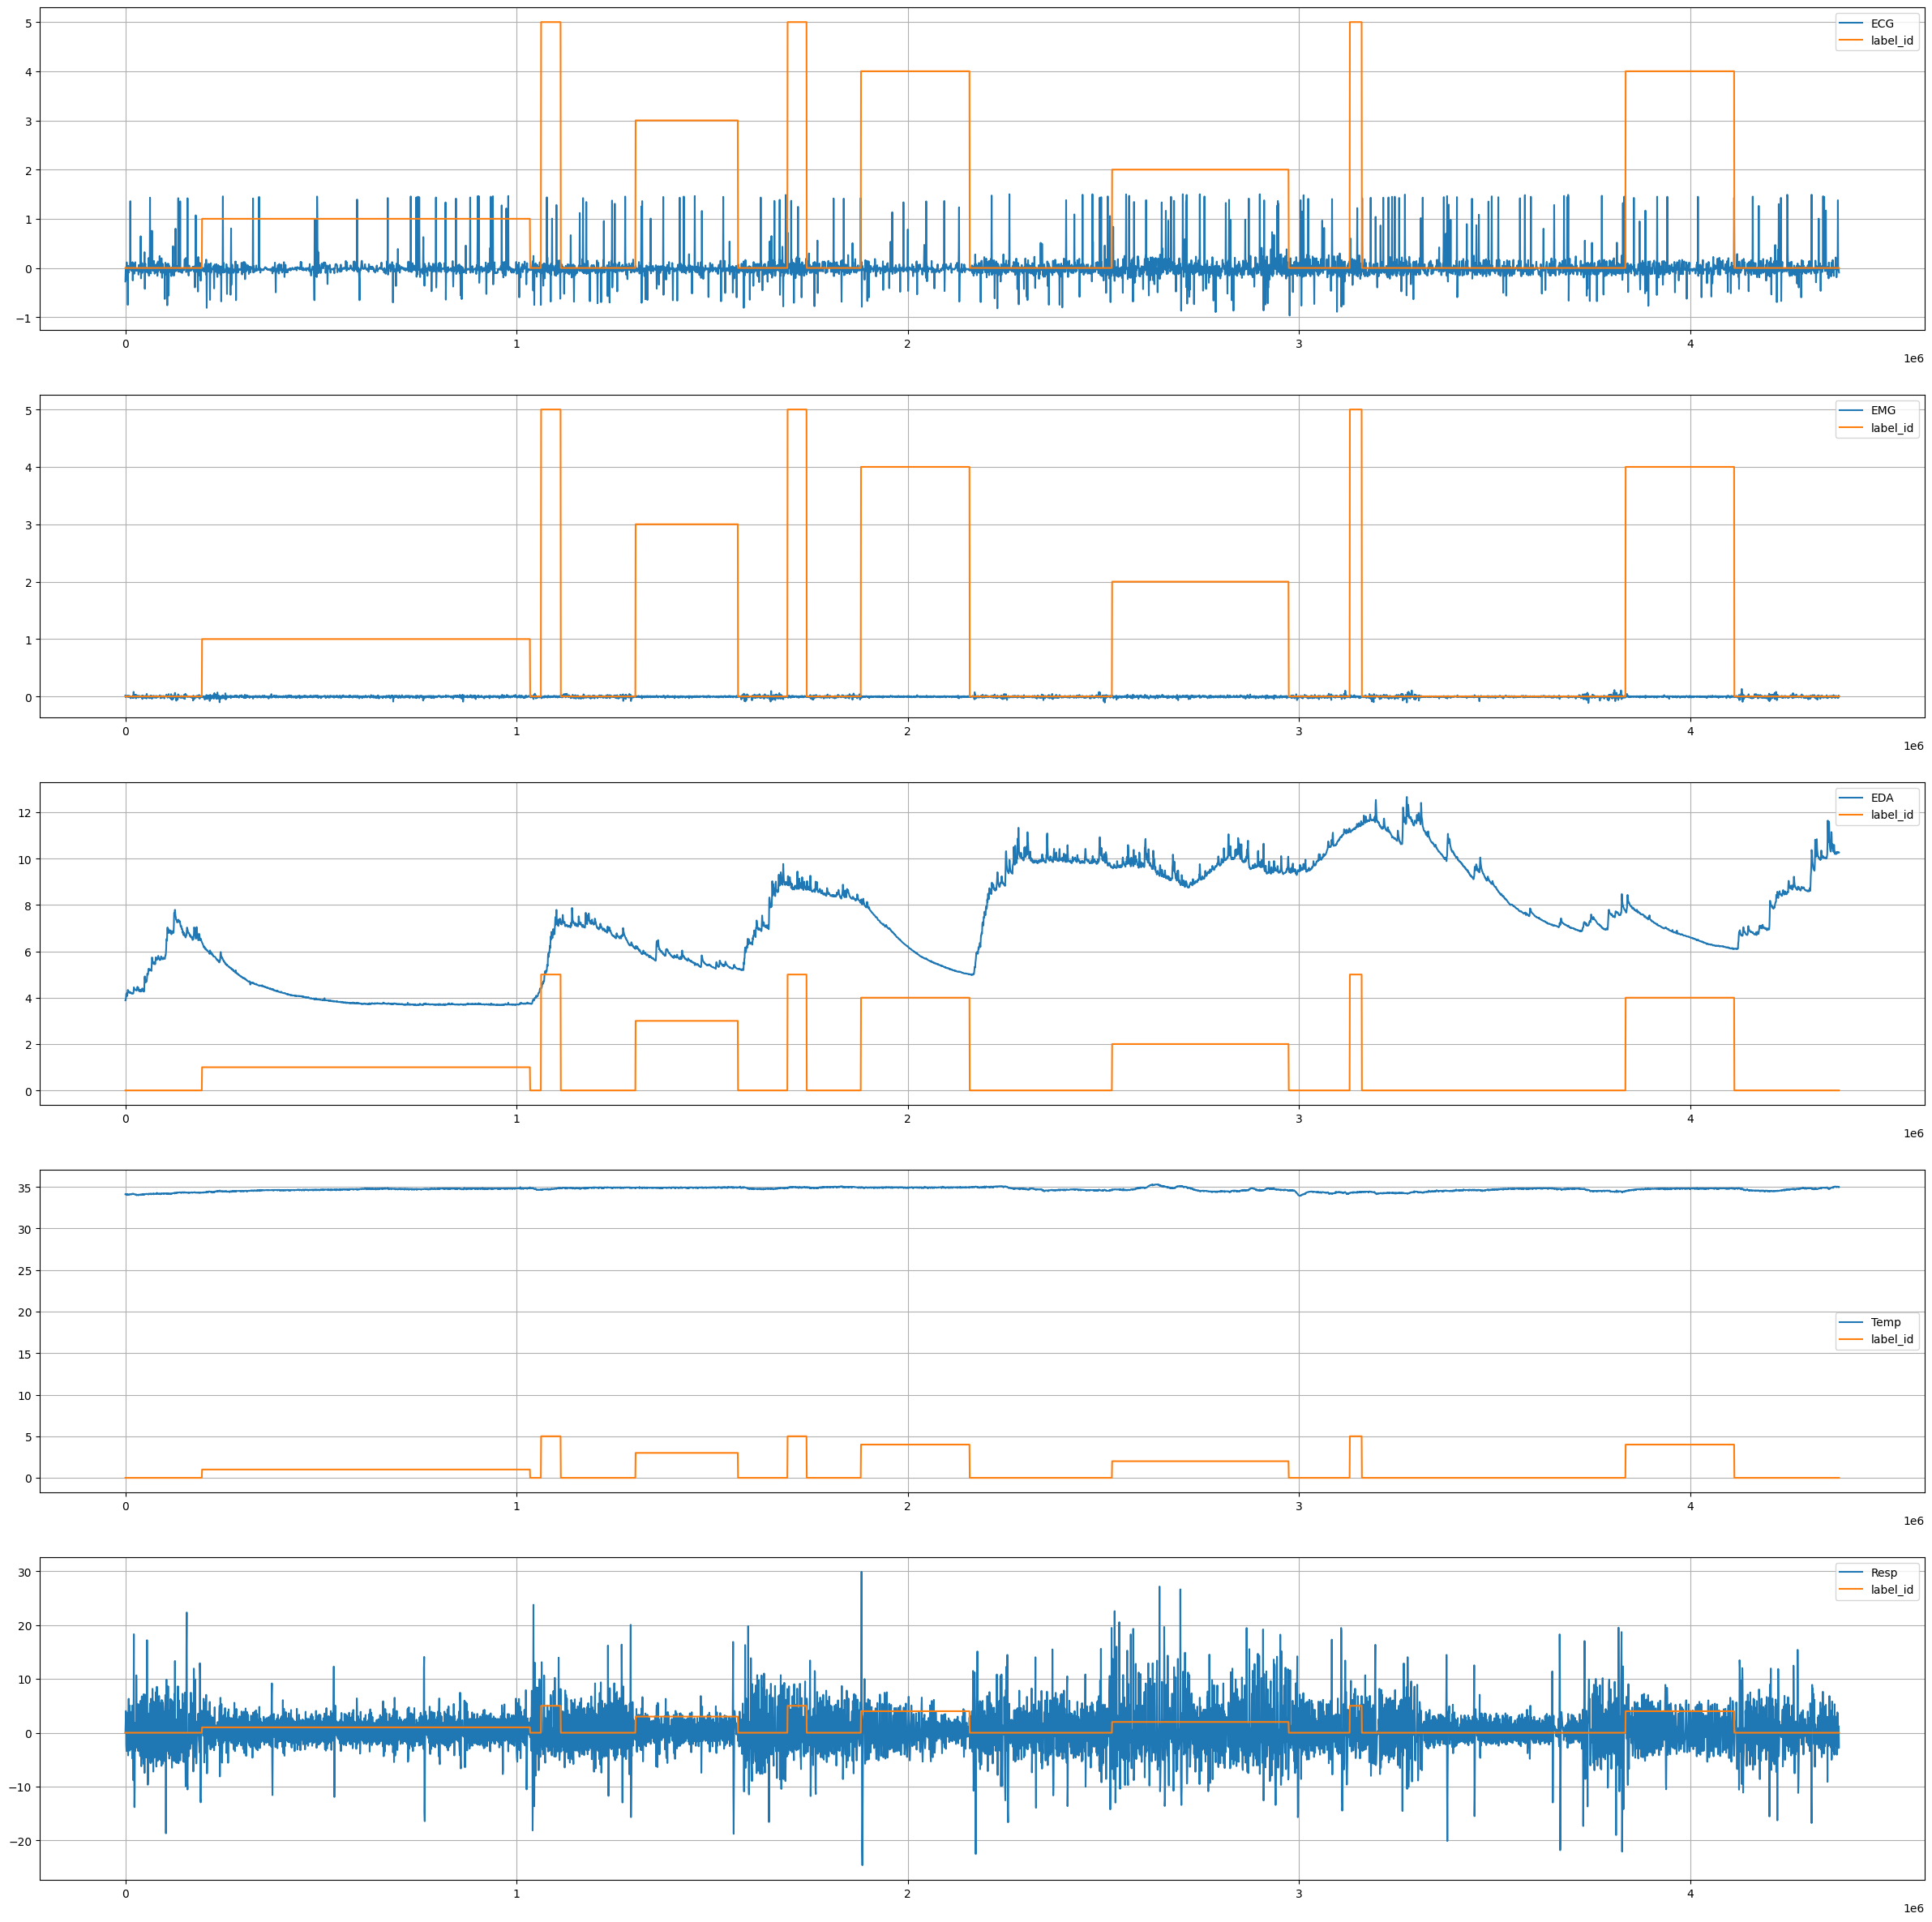

In [346]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1)

sample_df[::700].plot(figsize=(30, 30), grid=True, y=["ECG", "label_id"], ax=ax1)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["EMG", "label_id"], ax=ax2)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["EDA", "label_id"], ax=ax3)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["Temp", "label_id"], ax=ax4)
sample_df[::700].plot(figsize=(30, 30), grid=True, y=["Resp", "label_id"], ax=ax5)

In [200]:
sample_corr_df  = sample_df.corr("pearson")

sample_corr_df

,ECG,EMG,EDA,Temp,Resp,label_id
ECG,1.000000,-0.038543,-0.000210,-0.000223,-0.005208,0.000061
EMG,-0.038543,1.000000,-0.021898,-0.006276,-0.000312,0.003988
EDA,-0.000210,-0.021898,1.000000,-0.213464,-0.003151,-0.186922
Temp,-0.000223,-0.006276,-0.213464,1.000000,0.001937,0.346217
Resp,-0.005208,-0.000312,-0.003151,0.001937,1.000000,0.000427
label_id,0.000061,0.003988,-0.186922,0.346217,0.000427,1.000000


<AxesSubplot:>

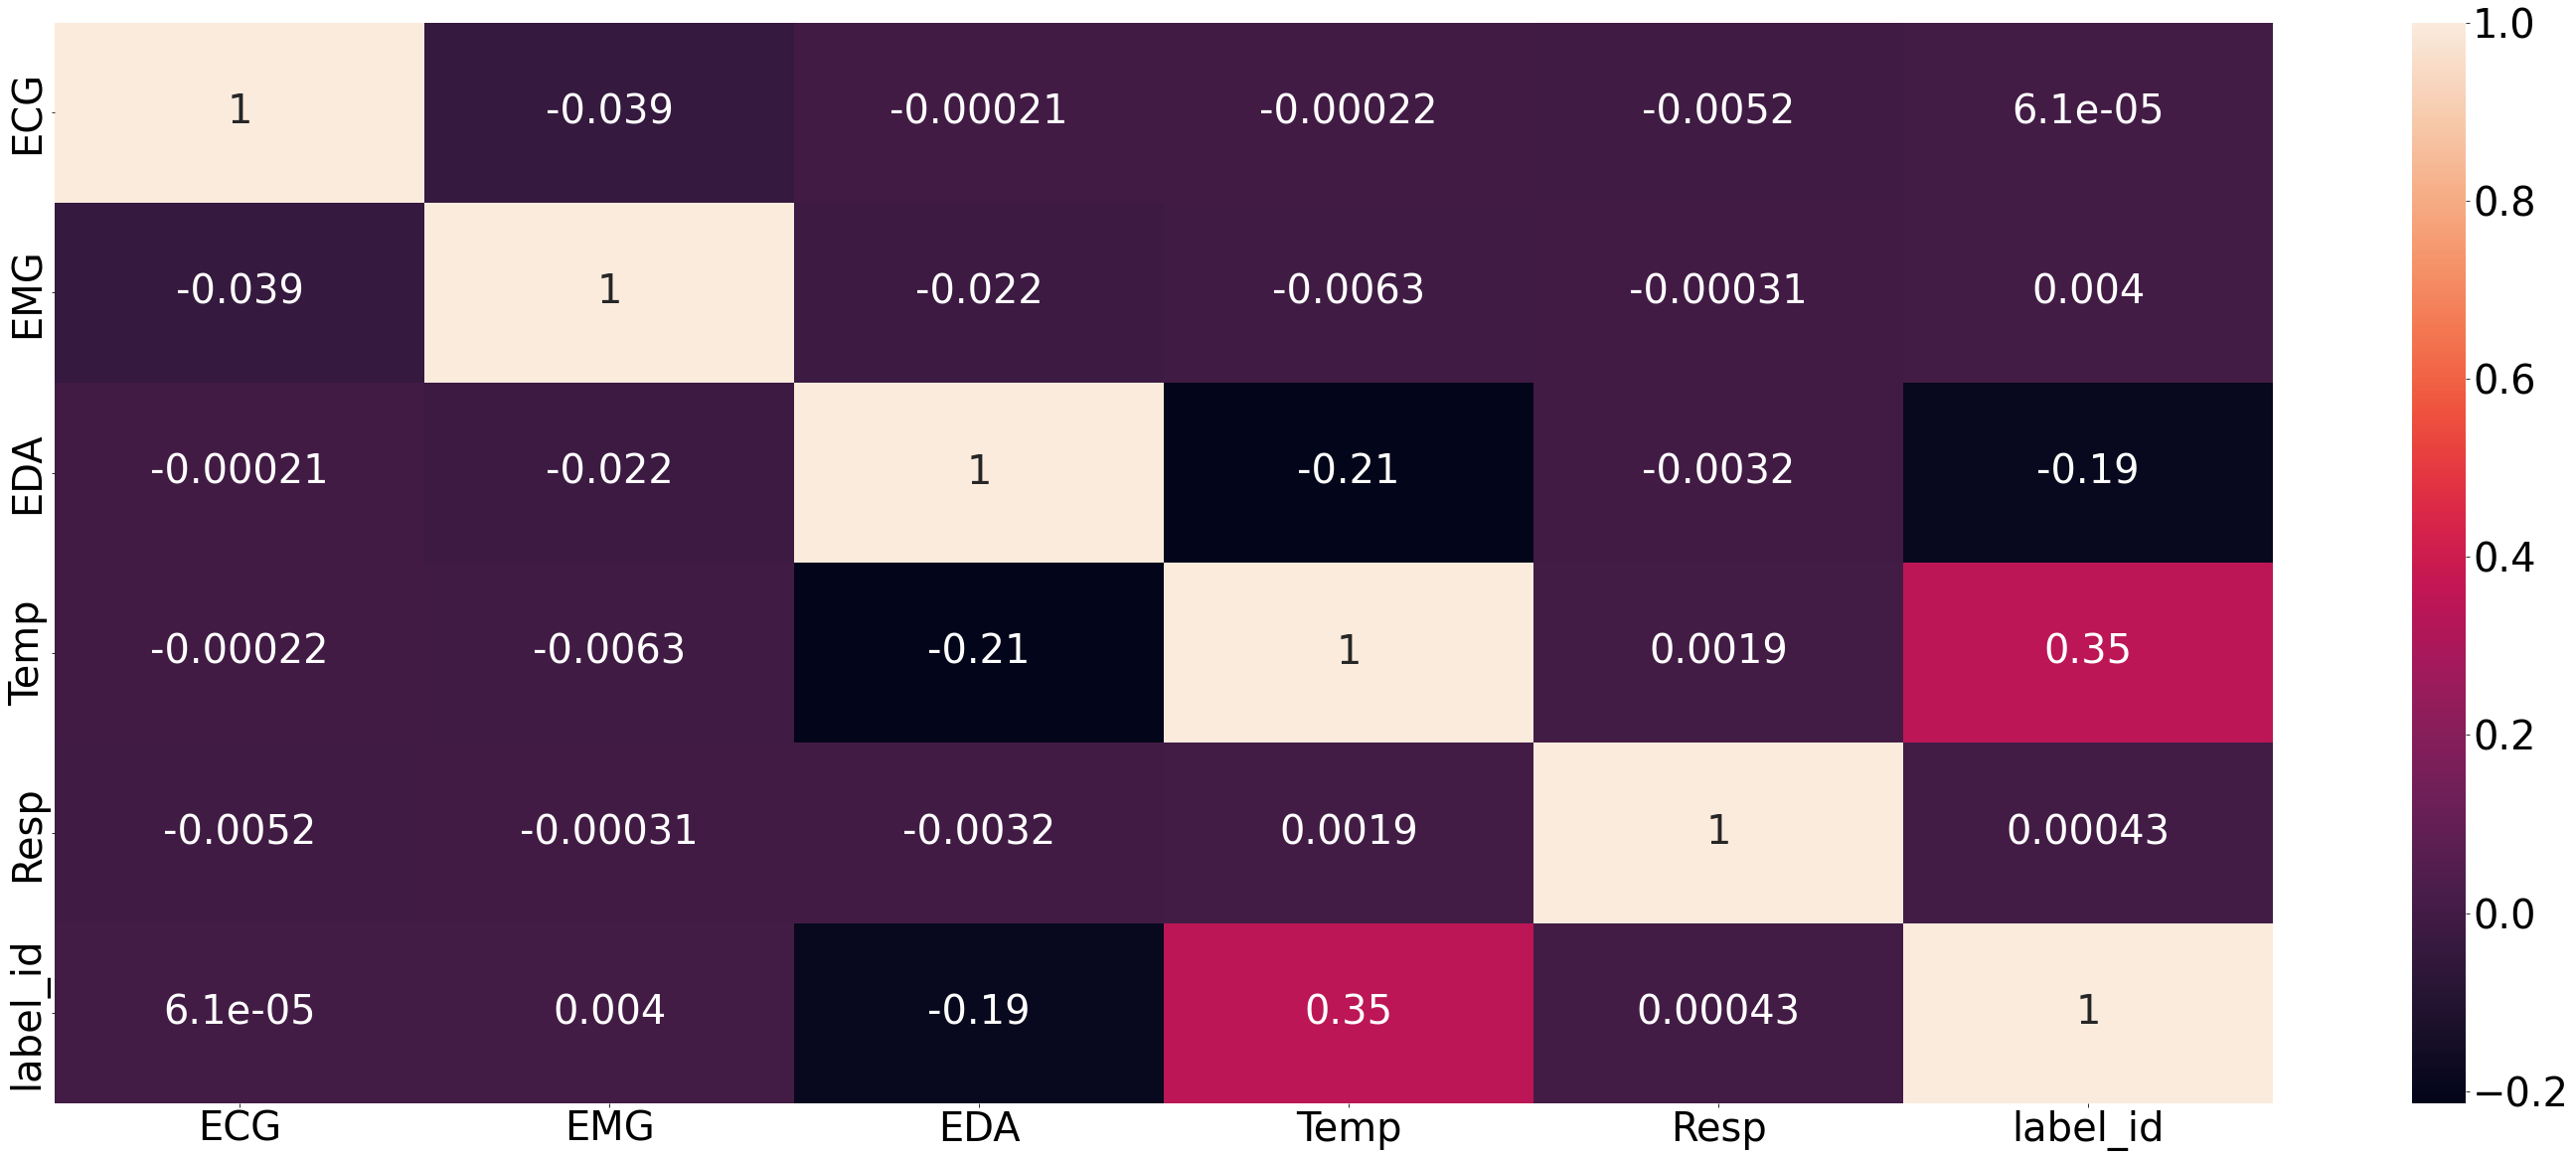

In [201]:
fig,ax_corr = plt.subplots(1, 1, figsize=(50,20))
plt.rcParams.update({'font.size': 40})

sn.heatmap(sample_corr_df, annot=True, ax=ax_corr)

# Cleaning Data

In [202]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [203]:
pacient_state_list  = [[state, pacient_state[state]] for state in pacient_state]

enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(pacient_state_list)

enc.categories_

[array([0, 1, 2, 3, 4, 5], dtype=object),
 array(['Amusement', 'Baseline', 'Error/Not Labeled', 'Meditation',
        'Not Defined/Transient', 'Stress'], dtype=object)]

In [204]:
win_size = 60 # represent 1 minute

def simple_rolling_z_score(x, window):
    r = x.rolling(window=window)
    m = r.mean()
    s = r.std(ddof=0)
    z = (x-m)/s
    return z

In [205]:
def rolling_z_score(df, win_size):

    copy_df = df.copy()

    for i in range(len(df) - win_size + 1):
        slicer = slice(i, win_size + i)
        mean = df[slicer].mean()
        std = df[slicer].std(ddof=0)

        copy_df[slicer] = (df[slicer] - mean) / std

    return copy_df


In [206]:
clean_chest_data = []

for data_df in input_chest_data:

    # resampling data choosing one point each 700 points

    resample_data_df = data_df[::700]

    # apllying one hot encoder

    # label = resample_data_df.pop("label").to_numpy()
    # label_id = resample_data_df.pop("label_id").to_numpy()
    resample_data_df.pop("label")

    # label_list = [[label_id[i], label[i]] for i in range(len(resample_data_df))]

    # target = enc.transform(label_list).toarray()

    target = resample_data_df.pop("label_id").to_numpy()

    # applying rolling score-z

    subject_label = resample_data_df.pop("subject").to_numpy()[0]

    nodmalized_data_df = rolling_z_score(
        resample_data_df,
        win_size
    )

    # tuple = (normalized_data_df, target, subject_label)

    clean_chest_data.append((nodmalized_data_df, target, subject_label))



In [207]:
sample = clean_chest_data[0]

In [208]:
sample

(              ECG       EMG       EDA      Temp      Resp
 1       -1.141354  1.010902 -3.086350  0.761450  0.014113
 701     -0.180240 -0.664806 -3.502281  0.003950  0.354657
 1401    -0.274072  0.947775 -3.141712  0.444722  0.807513
 2101     0.051459  0.534775 -1.374533  0.391319 -0.447787
 2801     0.203342  0.187253 -1.059586 -0.591657 -0.676844
 ...           ...       ...       ...       ...       ...
 4377101  3.688604  0.490229 -0.347143  1.430297  1.046071
 4377801 -0.220608 -1.806449 -0.304009  1.203311 -0.949383
 4378501 -0.370882  1.531488 -0.285798  0.852218 -0.178434
 4379201 -0.321395 -0.591647 -0.291549  0.233314  0.324026
 4379901 -0.474520  0.877932 -0.326055  0.686877 -0.914863
 
 [6258 rows x 5 columns],
 array([0, 0, 0, ..., 0, 0, 0]),
 'S5')

In [209]:
sample_data_df = sample[0]

In [210]:
sample_data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ECG,6258.0,-0.008513,1.004793,-6.563428,-0.307366,-0.116652,0.119997,7.582440
EMG,6258.0,0.000242,1.035429,-6.152012,-0.568847,0.044271,0.590430,5.852986
EDA,6258.0,0.345882,1.400994,-4.466730,-0.764205,0.376400,1.631442,5.557065
Temp,6258.0,-0.156492,1.214242,-4.190432,-0.991951,-0.072184,0.701792,4.071720
Resp,6258.0,-0.003516,1.021687,-5.952565,-0.662984,-0.139023,0.654771,4.669473


In [211]:
sample_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6258 entries, 1 to 4379901
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ECG     6258 non-null   float64
 1   EMG     6258 non-null   float64
 2   EDA     6258 non-null   float64
 3   Temp    6258 non-null   float32
 4   Resp    6258 non-null   float64
dtypes: float32(1), float64(4)
memory usage: 268.9 KB


In [212]:
sample_target = sample[1]

In [213]:
sample_target

array([0, 0, 0, ..., 0, 0, 0])

In [214]:
unique_values = np.unique(sample_target, axis=0)

In [215]:
unique_values

array([0, 1, 2, 3, 4, 5])

In [216]:
# decode_unique_values = enc.inverse_transform(unique_values)

In [217]:
# decode_unique_values

# Windowing

In [218]:
def get_most_repeted_element(np_array):
    (unique, counts) = np.unique(np_array, return_counts=True, axis=0)
    most_repeted_element_index = np.where(counts == max(counts))
    return unique[most_repeted_element_index[0][0]]

In [219]:
def get_window_feature_and_related_target(df, np_array, win_size):
    windows_list = []
    for i in range(len(df) - win_size + 1):
        slicer = slice(i, win_size + i)
        windows_list.append((df[slicer].to_numpy(), get_most_repeted_element(np_array[i:win_size+i])))
    return np.array(windows_list)

In [220]:
sample_window_target = get_window_feature_and_related_target(sample_data_df, sample_target, win_size)

/var/folders/7_/2_zd275d5mv2_2m6k8c0cqmc0000gq/T/ipykernel_16017/1102965131.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(windows_list)


In [221]:
sample_window_target[0][0]

array([[-1.14135380e+00,  1.01090174e+00, -3.08635004e+00,
         7.61449635e-01,  1.41128001e-02],
       [-1.80240021e-01, -6.64805531e-01, -3.50228098e+00,
         3.95013951e-03,  3.54657173e-01],
       [-2.74072260e-01,  9.47774799e-01, -3.14171184e+00,
         4.44722414e-01,  8.07512662e-01],
       [ 5.14586772e-02,  5.34774851e-01, -1.37453252e+00,
         3.91319096e-01, -4.47786975e-01],
       [ 2.03341985e-01,  1.87253041e-01, -1.05958642e+00,
        -5.91656923e-01, -6.76844055e-01],
       [ 5.20270293e-01,  2.42621583e-01, -1.92588078e+00,
         4.79015678e-01,  1.38846882e-01],
       [-1.01082822e+00, -2.14383455e-01, -2.54394250e+00,
        -8.25006723e-01, -5.15933413e-02],
       [ 1.79039367e-02, -1.71774414e-01, -2.60422474e+00,
         5.55276334e-01, -3.85099014e-01],
       [-3.41454189e-01,  8.86010104e-01, -6.30514547e-01,
        -1.45706904e+00,  6.88676762e-01],
       [-3.26528244e+00, -2.38711880e-02,  4.81683492e-01,
        -6.36333823e-01

In [222]:
sample_window_target[0][1]

0

In [223]:
sample_window_target[1]

array([array([[-1.80240021e-01, -6.64805531e-01, -3.50228098e+00,
         3.95013951e-03,  3.54657173e-01],
       [-2.74072260e-01,  9.47774799e-01, -3.14171184e+00,
         4.44722414e-01,  8.07512662e-01],
       [ 5.14586772e-02,  5.34774851e-01, -1.37453252e+00,
         3.91319096e-01, -4.47786975e-01],
       [ 2.03341985e-01,  1.87253041e-01, -1.05958642e+00,
        -5.91656923e-01, -6.76844055e-01],
       [ 5.20270293e-01,  2.42621583e-01, -1.92588078e+00,
         4.79015678e-01,  1.38846882e-01],
       [-1.01082822e+00, -2.14383455e-01, -2.54394250e+00,
        -8.25006723e-01, -5.15933413e-02],
       [ 1.79039367e-02, -1.71774414e-01, -2.60422474e+00,
         5.55276334e-01, -3.85099014e-01],
       [-3.41454189e-01,  8.86010104e-01, -6.30514547e-01,
        -1.45706904e+00,  6.88676762e-01],
       [-3.26528244e+00, -2.38711880e-02,  4.81683492e-01,
        -6.36333823e-01, -1.97923434e-01],
       [ 1.77439039e-01, -4.28558251e-01, -1.25683631e-01,
         9.59694

In [224]:
model_data = []
model_features = []
model_targets = []
subjects_list = []

for data in clean_chest_data:

    data_df = data[0]
    data_target = data[1]
    data_subject = data[2]

    window_target = get_window_feature_and_related_target(data_df, data_target, win_size)

    model_data.append(window_target)
    model_features.append(window_target[:,0])
    model_targets.append(window_target[:,1])
    subjects_list.append(data_subject)
    

/var/folders/7_/2_zd275d5mv2_2m6k8c0cqmc0000gq/T/ipykernel_16017/1102965131.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(windows_list)


In [225]:
# model_data[subject][specific window_feature_target][feature or target]

len(model_data)

15

In [226]:
# model_features[all windows_feature of a subject][specific feature]
# model_targets[all windows_target of a subject][specific target]

(model_data[0][0][0] == model_features[0][0]).all()

True

In [227]:
(model_data[0][0][1] == model_targets[0][0]).all()

True

In [228]:
(sample_window_target[0][0] == model_features[0][0]).all()

True

In [229]:
(sample_window_target[0][1] == model_data[0][0][1]).all()

True

In [230]:
# Number of windows_features of the first pacient

len(model_features[0])

6199

In [231]:
# Number of targets of the each window

len(model_targets[0])

6199

In [232]:
# Size of a window

len(model_features[0][0])

60

In [233]:
teste = np.array(model_features[0][0]).shape

In [234]:
print(f'For the window feature: \n\n {model_features[0][0]}\n\n')
print(f'With the zize: {len(model_features[0][0])}\n\n')
print(f'We have the following encoded mental state: \n\n {model_targets[0][0]}')

For the window feature: 

 [[-1.14135380e+00  1.01090174e+00 -3.08635004e+00  7.61449635e-01
   1.41128001e-02]
 [-1.80240021e-01 -6.64805531e-01 -3.50228098e+00  3.95013951e-03
   3.54657173e-01]
 [-2.74072260e-01  9.47774799e-01 -3.14171184e+00  4.44722414e-01
   8.07512662e-01]
 [ 5.14586772e-02  5.34774851e-01 -1.37453252e+00  3.91319096e-01
  -4.47786975e-01]
 [ 2.03341985e-01  1.87253041e-01 -1.05958642e+00 -5.91656923e-01
  -6.76844055e-01]
 [ 5.20270293e-01  2.42621583e-01 -1.92588078e+00  4.79015678e-01
   1.38846882e-01]
 [-1.01082822e+00 -2.14383455e-01 -2.54394250e+00 -8.25006723e-01
  -5.15933413e-02]
 [ 1.79039367e-02 -1.71774414e-01 -2.60422474e+00  5.55276334e-01
  -3.85099014e-01]
 [-3.41454189e-01  8.86010104e-01 -6.30514547e-01 -1.45706904e+00
   6.88676762e-01]
 [-3.26528244e+00 -2.38711880e-02  4.81683492e-01 -6.36333823e-01
  -1.97923434e-01]
 [ 1.77439039e-01 -4.28558251e-01 -1.25683631e-01  9.59694013e-02
  -8.29354685e-01]
 [-1.83612742e-01  1.65654157e-01 -5.6

# Model

In [235]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, LeakyReLU, Activation
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import tensorflow as tf

import datetime

In [351]:
# In order to validate the model, we are gonna drop the data of one 

model_features_validation = model_features.pop()
model_targets_validation = model_targets.pop()
print(f'Validation Subject: {subjects_list.pop()}')
print(f'Validation Feature Shape and Type: {model_features_validation.shape}, {type(model_features_validation)}')
print(f'Validation Target Shape and Type: {model_targets_validation.shape}, {type(model_targets_validation)}')

Validation Subject: S14
Validation Feature Shape and Type: (5489,), <class 'numpy.ndarray'>
Validation Target Shape and Type: (5489,), <class 'numpy.ndarray'>


In [353]:
model_targets_validation

array([1, 1, 1, ..., 0, 0, 0], dtype=object)

In [364]:
model_features[0].shape

(6199,)

In [367]:
model_targets[0].shape

(6199,)

In [237]:
# Group data of all subjects in one array

features = model_features[0]
targets = model_targets[0]

for i in range(1, len(subjects_list)):
    features = np.concatenate((features, model_features[i]), axis=0)
    targets = np.concatenate((targets, model_targets[i]), axis=0)

In [372]:
# features: has all windows with size of 60

features.shape, features[0].shape

((80790,), (60, 5))

In [239]:
# targets: has all targets for each window with size of 60

targets.shape

(80790,)

In [376]:
# converting to Tensors

features_tensor =  tf.convert_to_tensor(
    np.array(
        [tf.convert_to_tensor(data) for data in features]
    )
)

features_tensor.shape

TensorShape([80790, 60, 5])

In [242]:
targets

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [271]:
targets.reshape(len(targets),-1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [377]:
targets_tensor =  tf.convert_to_tensor(targets.reshape(len(targets),-1), dtype="int64")

targets_tensor.shape


TensorShape([80790, 1])

In [275]:
targets_tensor

<tf.Tensor: shape=(80790, 1), dtype=int64, numpy=
array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])>

In [379]:
models_to_test = {
    "softmax": {
        "has_activator": True,
        "color_plot": "blue",
        "callbacks": [
            EarlyStopping(
                monitor='val_loss',
                patience=2,
                mode='min'
            ),
            TensorBoard(
                log_dir = "logs/softmax/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
                write_graph=True,
                histogram_freq=5
            )
        ]
    }
    # "sigmoid": {
    #     "has_activator": True,
    #     "color_plot": "red",
    #     "callbacks": [
    #         EarlyStopping(
    #             monitor='val_loss',
    #             patience=2,
    #             mode='min'
    #         ),
    #         TensorBoard(
    #             log_dir = "logs/sigmoid/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    #             write_graph=True,
    #             histogram_freq=5
    #         )
    #     ]
    # },
    # "no_activatior": {
    #     "has_activator": False,
    #     "color_plot": "green",
    #     "callbacks": [
    #         EarlyStopping(
    #             monitor='val_loss',
    #             patience=2,
    #             mode='min'
    #         ),
    #         TensorBoard(
    #             log_dir = "logs/no_activator/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    #             write_graph=True,
    #             histogram_freq=5
    #         )
    #     ]
    # }
    
}

2021-11-03 15:41:26.298751: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-03 15:41:26.298762: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-03 15:41:26.299183: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [380]:
models_to_test

{'softmax': {'has_activator': True,
  'color_plot': 'blue',
  'callbacks': [<keras.callbacks.EarlyStopping at 0x183501a30>,
   <keras.callbacks.TensorBoard at 0x183501ac0>]}}

In [387]:
def create_model(last_activation_layer, has_activator):
    model = Sequential()

    model.add(LSTM(128, input_shape=(win_size, 5), return_sequences=True))
    model.add(LeakyReLU(alpha=0.5))
    model.add(LSTM(128, return_sequences=True))
    model.add(LeakyReLU(alpha=0.5))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(6))
    if has_activator:
        model.add(Activation(last_activation_layer))

    model.summary()

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    return model


In [388]:
for model_name in models_to_test:

    has_activator = models_to_test[model_name]["has_activator"]

    model = create_model(model_name, has_activator)
    history = model.fit(
        x=features_tensor,
        y=targets_tensor,
        validation_split=0.2,
        epochs=50,
        shuffle=False,
        callbacks=models_to_test[model_name]["callbacks"]
    )

    model.save(f"stress_detection_lstm_{model_name}_activator")

    models_to_test[model_name]["history"] = history
    models_to_test[model_name]["model"] = model


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 60, 128)           68608     
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 60, 128)           0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 60, 128)           0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_19 (Dense)             (None, 6)               

2021-11-03 15:49:02.636187: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-03 15:49:02.636200: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-03 15:49:03.031127: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-03 15:49:03.130672: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-03 15:49:03.234414: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/softmax/fit/20211103-154126/train/plugins/profile/2021_11_03_15_49_03

2021-11-03 15:49:03.297950: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/softmax/fit/20211103-154126/train/plugins/profile/2021_11_03_15_49_03/C02D602YMD6Q.trace.json.gz
2021-11-03 15:49:03.345587: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/softmax/fit/2021

2020/2020 [==============================] - 171s 82ms/step - loss: 1.5868 - accuracy: 0.4650 - val_loss: 1.5276 - val_accuracy: 0.4147
Epoch 2/50
2020/2020 [==============================] - 196s 97ms/step - loss: 1.5101 - accuracy: 0.4646 - val_loss: 1.5288 - val_accuracy: 0.4147
Epoch 3/50
2020/2020 [==============================] - 202s 100ms/step - loss: 1.5019 - accuracy: 0.4646 - val_loss: 1.5288 - val_accuracy: 0.4147


INFO:tensorflow:Assets written to: stress_detection_lstm_softmax_activator/assets


INFO:tensorflow:Assets written to: stress_detection_lstm_softmax_activator/assets


In [389]:
models_to_test

{'softmax': {'has_activator': True,
  'color_plot': 'blue',
  'callbacks': [<keras.callbacks.EarlyStopping at 0x183501a30>,
  'history': <keras.callbacks.History at 0x17e3a8730>,
  'model': <keras.engine.sequential.Sequential at 0x17fe0f400>}}

In [390]:
history.history

{'loss': [1.5867955684661865, 1.5100654363632202, 1.5019243955612183],
 'accuracy': [0.4649709165096283, 0.46464598178863525, 0.46464598178863525],
 'val_loss': [1.527598261833191, 1.5287885665893555, 1.528830647468567],
 'val_accuracy': [0.41465526819229126,
  0.41465526819229126,
  0.41465526819229126]}

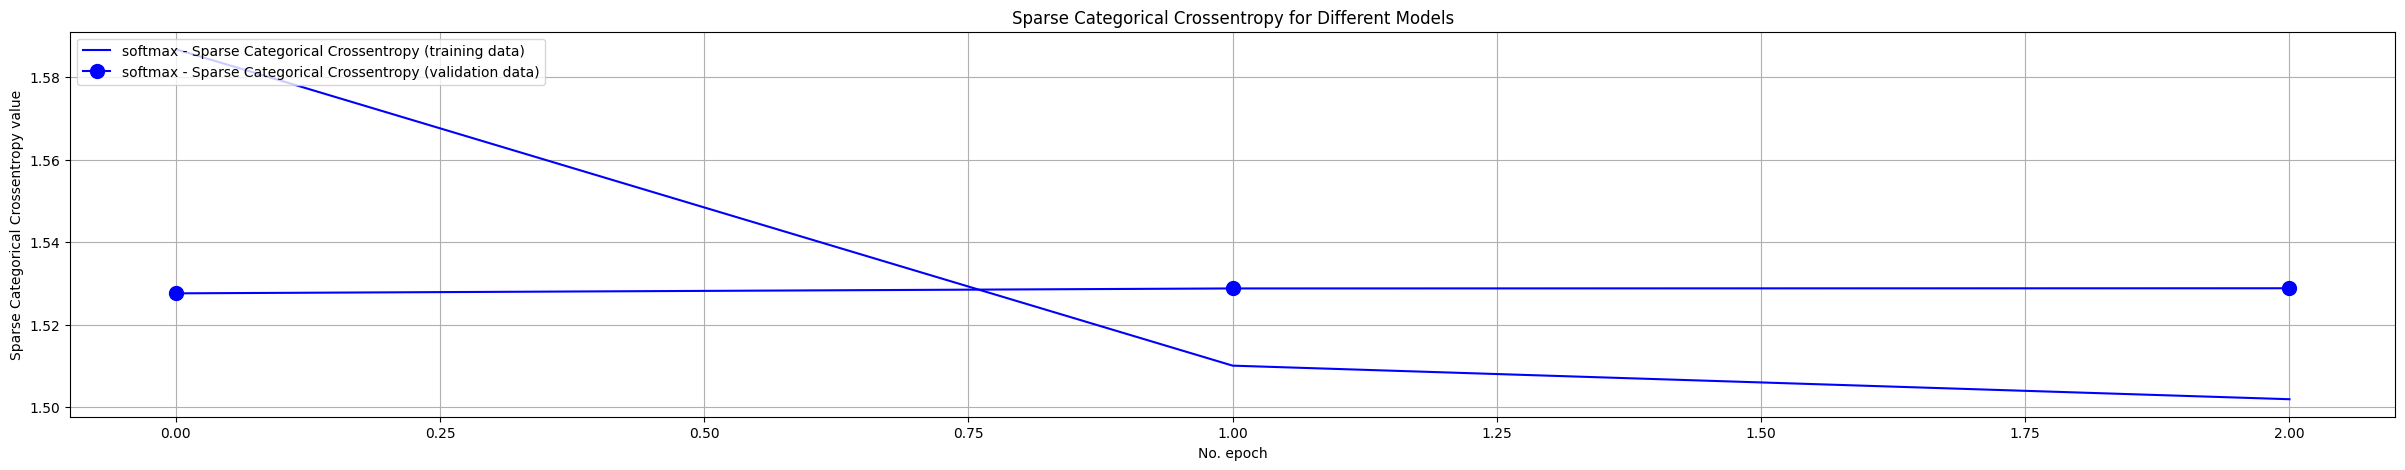

In [391]:
plt.rcdefaults()
plt.figure(figsize=(30,5))

for model_name in models_to_test:
    color_plot = models_to_test[model_name]["color_plot"]
    history = models_to_test[model_name]["history"]
    plt.plot(history.history['loss'], label=f'{model_name} - Sparse Categorical Crossentropy (training data)', color=color_plot)
    plt.plot(history.history['val_loss'], label=f'{model_name} - Sparse Categorical Crossentropy (validation data)', color=color_plot, marker=".", markersize=20)

plt.title('Sparse Categorical Crossentropy for Different Models')
plt.ylabel('Sparse Categorical Crossentropy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

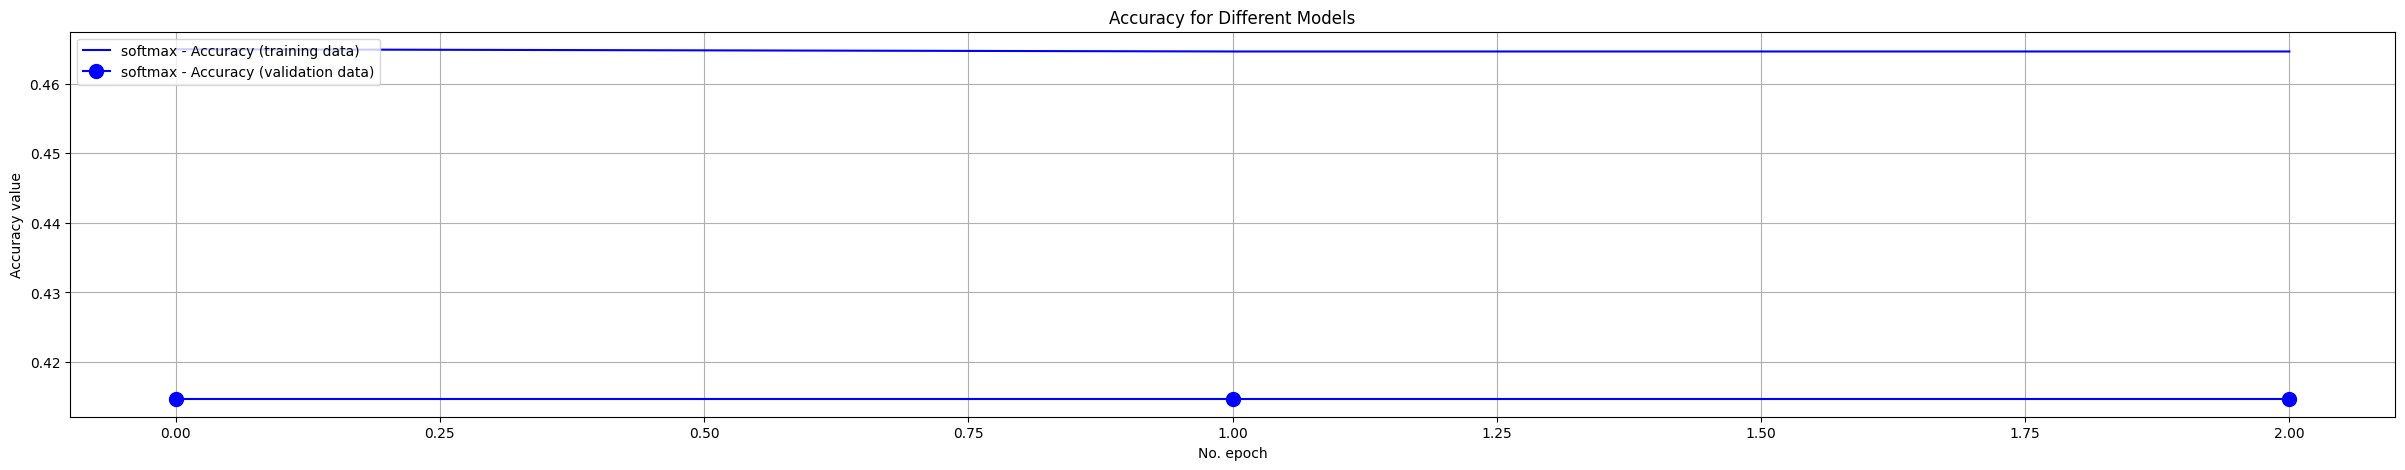

In [392]:
plt.rcdefaults()
plt.figure(figsize=(30,5))

for model_name in models_to_test:
    color_plot = models_to_test[model_name]["color_plot"]
    history = models_to_test[model_name]["history"]
    plt.plot(history.history['accuracy'], label=f'{model_name} - Accuracy (training data)', color=color_plot)
    plt.plot(history.history['val_accuracy'], label=f'{model_name} - Accuracy (validation data)', color=color_plot, marker=".", markersize=20)

plt.title('Accuracy for Different Models')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [58]:
# lstm_model.evaluate(
#     x=features_tensor,
#     y=targets_tensor
# )

## Making Predictions

In [ ]:
model.evaluate(
    
)

In [312]:
len(model_features_validation)

5193

In [313]:
features_tensor_validation =  tf.convert_to_tensor(
    np.array(
        [tf.convert_to_tensor(data) for data in model_features_validation]
    )
)


In [314]:
features_tensor_validation

<tf.Tensor: shape=(5193, 60, 5), dtype=float64, numpy=
array([[[-4.65943125e-02, -9.04284684e-01, -6.64559137e-01,
         -4.89919394e-01,  1.63959898e-01],
        [ 1.51342789e-01,  8.11712260e-01, -1.93284080e+00,
         -1.14633667e+00,  3.45247980e-01],
        [-4.70135591e-01, -1.04226242e-01, -8.41134923e-01,
         -2.13595033e+00, -7.00115834e-01],
        ...,
        [-8.91612405e-01, -1.07396680e+00, -1.87933942e+00,
         -1.39711654e+00, -4.30786096e-02],
        [ 6.48519759e-02, -7.52638404e-01, -2.67509237e+00,
          3.69179308e-01,  4.86917491e-01],
        [-9.09065533e-01, -7.63304895e-01, -7.24960597e-01,
          2.49215201e-01,  2.21087009e-01]],

       [[ 1.51342789e-01,  8.11712260e-01, -1.93284080e+00,
         -1.14633667e+00,  3.45247980e-01],
        [-4.70135591e-01, -1.04226242e-01, -8.41134923e-01,
         -2.13595033e+00, -7.00115834e-01],
        [ 1.06858273e-01,  1.07392247e+00, -2.10743732e+00,
         -9.96365130e-01,  1.30739834e

In [315]:
for model_name in models_to_test:
    models_to_test[model_name]["predictions"] = models_to_test[model_name]["model"].predict( x = features_tensor_validation )

In [316]:
models_to_test

{'softmax': {'has_activator': True,
  'color_plot': 'blue',
  'callbacks': [<keras.callbacks.EarlyStopping at 0x17cc003a0>,
  'history': <keras.callbacks.History at 0x1856ebfa0>,
  'model': <keras.engine.sequential.Sequential at 0x17ffa5100>,
  'predictions': array([[0.16668245, 0.166738  , 0.16664726, 0.16658208, 0.16673042,
          0.16661973],
         [0.16668902, 0.1667278 , 0.16666168, 0.1665868 , 0.1667172 ,
          0.16661754],
         [0.16669522, 0.16672662, 0.16666785, 0.16658615, 0.16670501,
          0.16661912],
         ...,
         [0.16670923, 0.16669488, 0.16667876, 0.16657051, 0.16668002,
          0.16666652],
         [0.16670282, 0.16669312, 0.16669777, 0.16657007, 0.16668566,
          0.16665062],
         [0.16668412, 0.16668539, 0.16672176, 0.1665711 , 0.16668825,
          0.16664939]], dtype=float32)},
 'sigmoid': {'has_activator': True,
  'color_plot': 'red',
  'callbacks': [<keras.callbacks.EarlyStopping at 0x17cc004f0>,
  'history': <keras.callbacks

In [317]:
sigmoid_predictions = models_to_test["sigmoid"]["predictions"]
softmax_predictions = models_to_test["softmax"]["predictions"]
no_activator_predictions = models_to_test["no_activatior"]["predictions"]

In [337]:
# sigmoid_predictions
softmax_predictions
# no_activator_predictions

array([[0.16668245, 0.166738  , 0.16664726, 0.16658208, 0.16673042,
        0.16661973],
       [0.16668902, 0.1667278 , 0.16666168, 0.1665868 , 0.1667172 ,
        0.16661754],
       [0.16669522, 0.16672662, 0.16666785, 0.16658615, 0.16670501,
        0.16661912],
       ...,
       [0.16670923, 0.16669488, 0.16667876, 0.16657051, 0.16668002,
        0.16666652],
       [0.16670282, 0.16669312, 0.16669777, 0.16657007, 0.16668566,
        0.16665062],
       [0.16668412, 0.16668539, 0.16672176, 0.1665711 , 0.16668825,
        0.16664939]], dtype=float32)

In [319]:
no_activator_predictions.shape

(5193, 6)

In [328]:
predictions = []
for i in range(len(softmax_predictions)):
    predictions.append(np.argmax(softmax_predictions[i]))

In [331]:
len(predictions)

5193

In [338]:
predictions_array = np.array(predictions)

In [341]:
predictions_array

array([1, 1, 1, ..., 0, 0, 2])

In [333]:
model_targets_validation

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [347]:
df_y = pd.DataFrame({
    "y_test": model_targets_validation,
    "y_pred": predictions_array
})

df_y.head(10)

,y_test,y_pred
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,4
8,0,1
9,0,2


<AxesSubplot:>

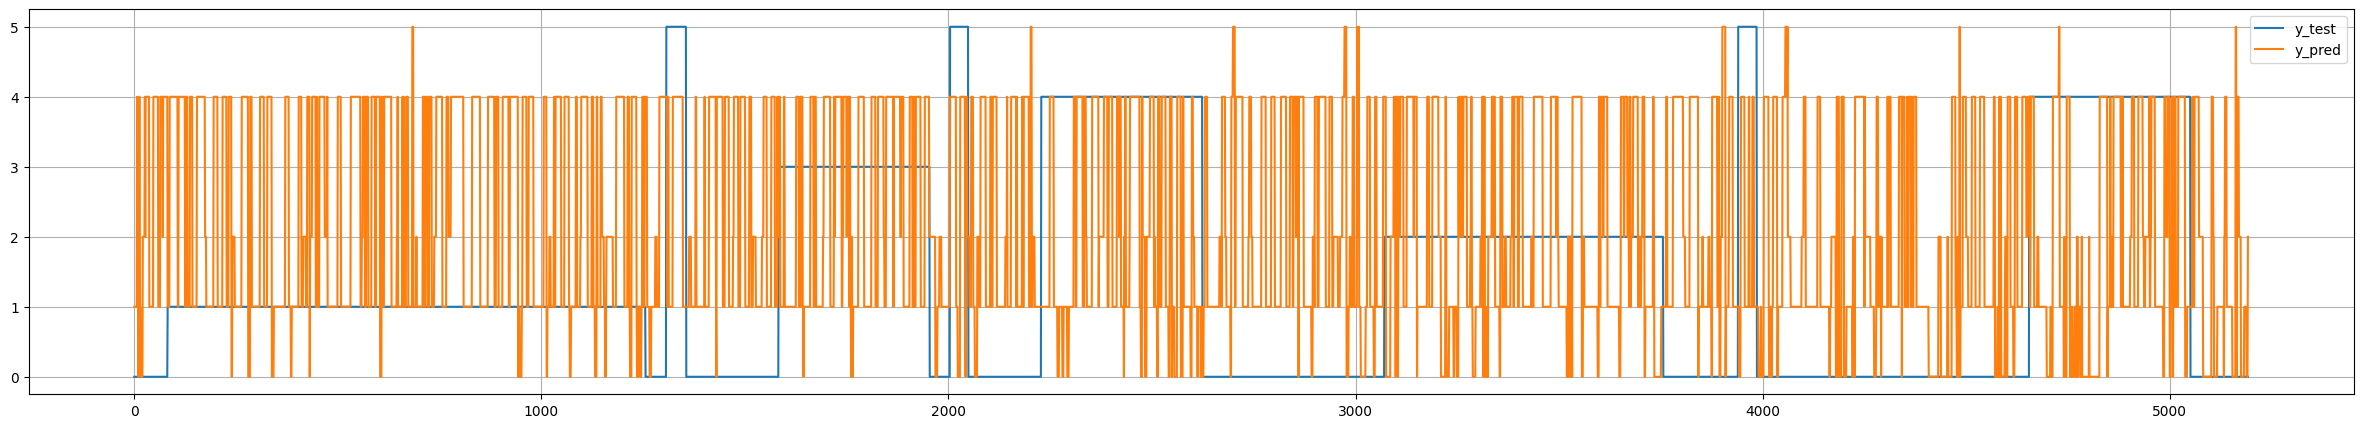

In [345]:
df_y.plot(figsize=(30, 5), grid=True)

In [321]:
np.argmax(no_activator_predictions[0])

2

In [307]:
max(no_activator_predictions)

array([1.3695765], dtype=float32)

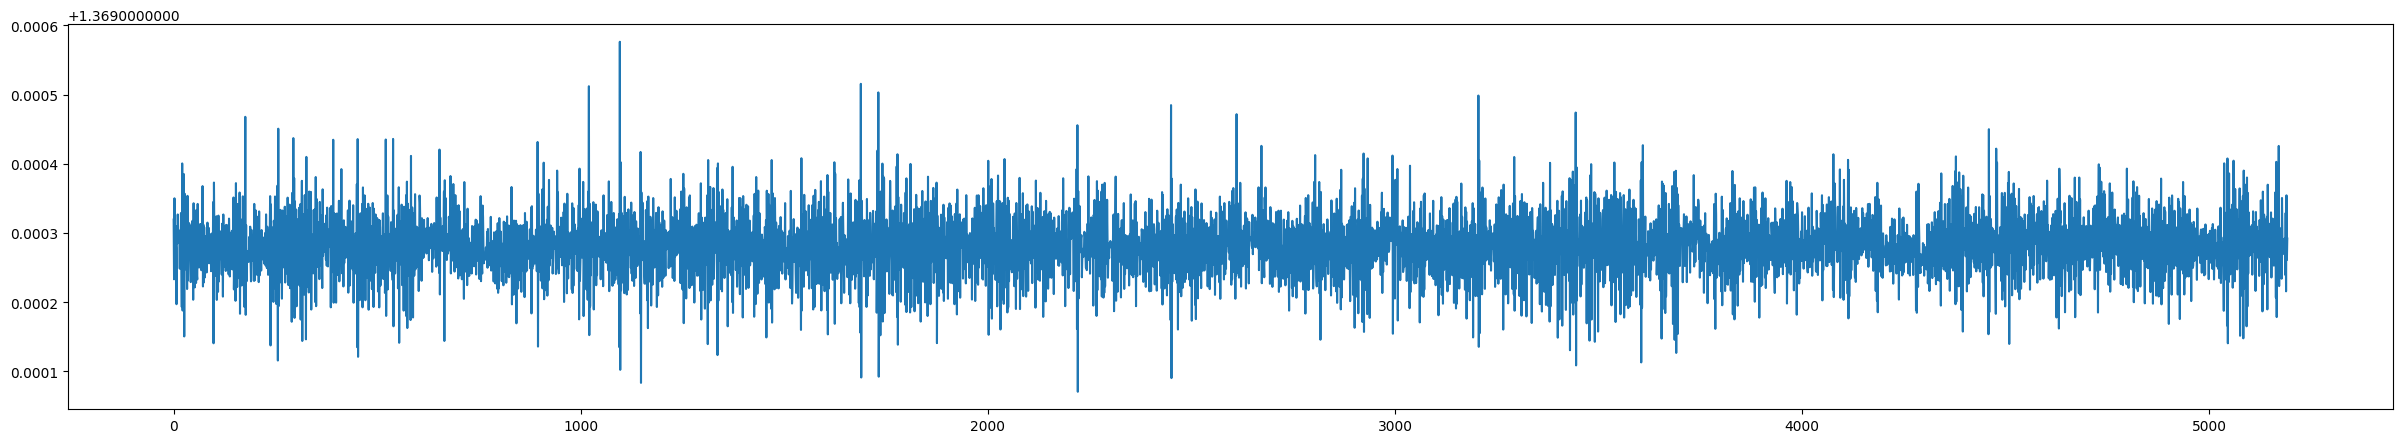

In [306]:
plt.figure(figsize=(30,5))
plt.plot(range(len(no_activator_predictions)) ,no_activator_predictions)


In [66]:
# sigmoid_predictions[0]
softmax_predictions[0]

array([4.0361503e-01, 5.2034285e-02, 1.6028665e-02, 8.6771240e-07,
       2.8309876e-02, 5.6386256e-08, 5.5722531e-08, 5.8258870e-08,
       6.3846761e-07, 5.2033059e-02, 9.7367447e-08, 2.8310494e-02,
       4.0361136e-01, 1.6055416e-02], dtype=float32)

In [67]:
# sigmoid_predictions[1]
softmax_predictions[1]

array([4.0361506e-01, 5.2034289e-02, 1.6028667e-02, 8.6771246e-07,
       2.8309869e-02, 5.6386259e-08, 5.5722534e-08, 5.8258820e-08,
       6.3846824e-07, 5.2033052e-02, 9.7367455e-08, 2.8310491e-02,
       4.0361130e-01, 1.6055413e-02], dtype=float32)

In [68]:
def test_predictions(predictions_test, num_labels):
    label_index_teste = np.argmax(predictions_test[0][:num_labels])
    state_index_teste = np.argmax(predictions_test[0][num_labels:])

    for array in predictions_test:
        if (label_index_teste != np.argmax(array[:num_labels])) and (state_index_teste != np.argmax(array[num_labels:])):
            print("Exist at least one different prediction")
            return
    print("Does not exist different predictions")


In [69]:
test_predictions(softmax_predictions, num_labels)

Does not exist different predictions


In [70]:
test_predictions(sigmoid_predictions, num_labels)

Does not exist different predictions


In [71]:
test_predictions(no_activator_predictions, num_labels)

Does not exist different predictions


In [72]:
def transform_prediction(prediction_np, num_states, num_labels):
    zeros_base_array = np.zeros(num_labels + num_states)

    label_index = np.argmax(prediction_np[:num_labels])
    state_index = np.argmax(prediction_np[num_labels:])

    zeros_base_array[label_index] = 1
    zeros_base_array[num_labels + state_index] = 1

    return zeros_base_array

In [73]:
transformed_array_list = []


for prediction in sigmoid_predictions:
    binary_array = transform_prediction(prediction, num_states, num_labels).reshape(1, num_states + num_labels)
    transformed_array_list.append(binary_array)


In [74]:
fittable_econder_array = np.concatenate(transformed_array_list, axis=0)

In [75]:
unique_values = np.unique(fittable_econder_array, axis=0)

unique_values

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [76]:
enc.inverse_transform(fittable_econder_array)

array([[0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient'],
       ...,
       [0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient']], dtype=object)

In [77]:
enc.get_feature_names()

/Users/I546644/Personal/Unisinos/unisinos-stress-detection/env-stress-detection/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7',
       'x1_Amusement', 'x1_Baseline', 'x1_Error/Not Labeled',
       'x1_Meditation', 'x1_Not Defined/Transient', 'x1_Stress'],
      dtype=object)

In [78]:
target_validation_array_list = []

for array in model_targets_validation:
    target_validation_array_list.append(array.reshape(1,14))

target_validation_array = np.concatenate(target_validation_array_list, axis=0)

In [79]:
target_validation_array

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [80]:
target_validation_array[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [81]:
target_validation_array[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [82]:
unique_values1 = np.unique(target_validation_array, axis=0)

unique_values1

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [83]:
np.concatenate(target_validation_array_list, axis=0)

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [84]:
labeled_validation = enc.inverse_transform(model_targets_validation.tolist())

In [85]:
labeled_validation

array([[0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient'],
       ...,
       [0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient'],
       [0, 'Not Defined/Transient']], dtype=object)